# Neural Network ANLY 590
## April Chung

## 1.1

## Lasso Regression

In [28]:
import pandas as pd
import sklearn.cross_validation as cv
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#importing the data
hitters = pd.read_csv('Hitters.csv')

#checking the data types
hitters.dtypes


Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object

In [31]:
#dropping all the n/a values in the response variable
hittersv2 = hitters.dropna(subset = ['Salary'])
y = hittersv2['Salary']

#subsetting the table w/ only numeric predictors
X = hittersv2.select_dtypes(include = ['int64'] )

In [32]:
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=123)

In [33]:
n_alphas = 200
alphas = np.logspace(-4, 3, n_alphas)

mod_lasso = linear_model.Lasso(normalize = True, max_iter =1e5)
coefs = []
for a in alphas:
    mod_lasso.set_params(alpha = a)
    mod_lasso.fit(X_train, y_train)
    coefs.append(mod_lasso.coef_)

### The Coefficient Trajectory Graph

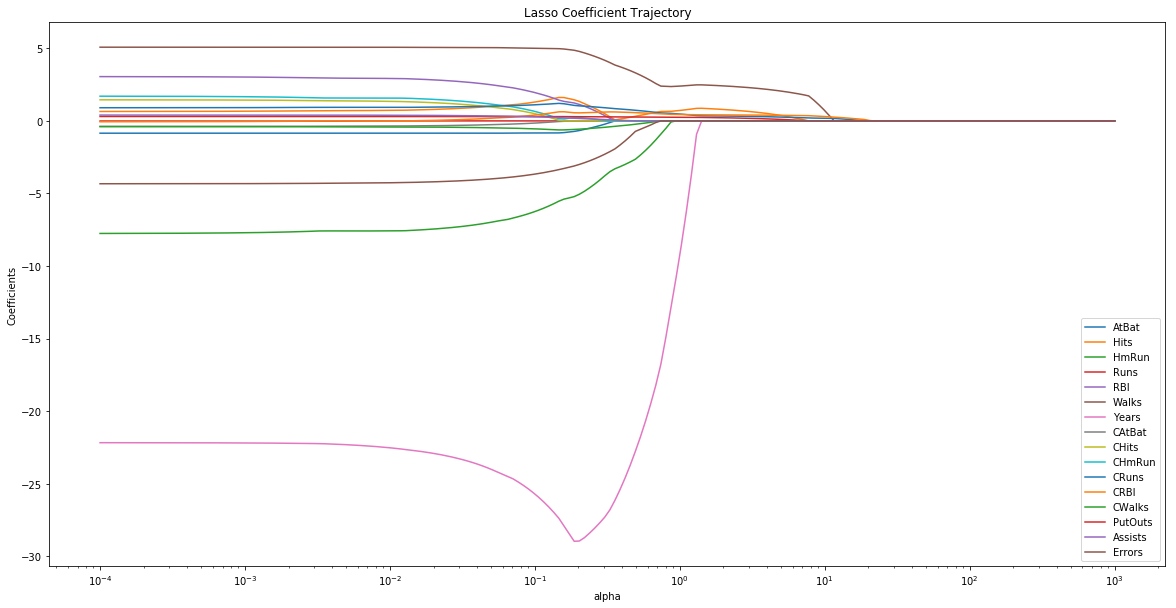

In [34]:
plt.figure(figsize = (20, 10))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title("Lasso Coefficient Trajectory")
plt.legend(X.columns)
plt.show()

*The three remaining fields in Lasso Regression -- indicative of the strongest predictors in the model*

In [35]:
df = pd.DataFrame(coefs[143], X.columns, columns = ['Coefficient'])
df[df['Coefficient'] > 0]

,Coefficient
Walks,0.383631
CRuns,0.178303
CRBI,0.281908


In [36]:
model = LassoCV(alphas = alphas, cv = 10, max_iter = 1e5, normalize = True)
model.fit(X_train, y_train)
mod_lasso.set_params(alpha = model.alpha_)
mod_lasso.fit(X_train, y_train)
y_pred = mod_lasso.predict(X_test)
print("The optimal alpha value for Lasso model ", model.alpha_)

The optimal alpha value for Lasso model  0.32929712551


In [37]:
y_pred_train = mod_lasso.predict(X_train)
print("The training error is ", np.sqrt(np.mean((y_train -y_pred_train)**2)))

The training error is  318.963339805


In [38]:
print("The testing error is ", np.sqrt(np.mean((y_test -y_pred)**2)))

The testing error is  364.731095582


*The fields included in the Lasso Regression Model*

In [39]:
df = pd.DataFrame(X.columns,mod_lasso.coef_)
df

,0
-0.114342,AtBat
0.284832,Hits
-3.501550,HmRun
0.000000,Runs
0.171445,RBI
4.017054,Walks
-26.796971,Years
-0.000000,CAtBat
0.000000,CHits
0.000000,CHmRun


## 1.2
## Ridge Regression

In [40]:
mod_ridge = linear_model.Ridge(alpha = alphas, normalize = True, max_iter =1e5)
coefs_r = []
for a in alphas:
    mod_ridge.set_params(alpha = a)
    mod_ridge.fit(X_train, y_train)
    coefs_r.append(mod_ridge.coef_)

### The Coefficient Trajectory Graph

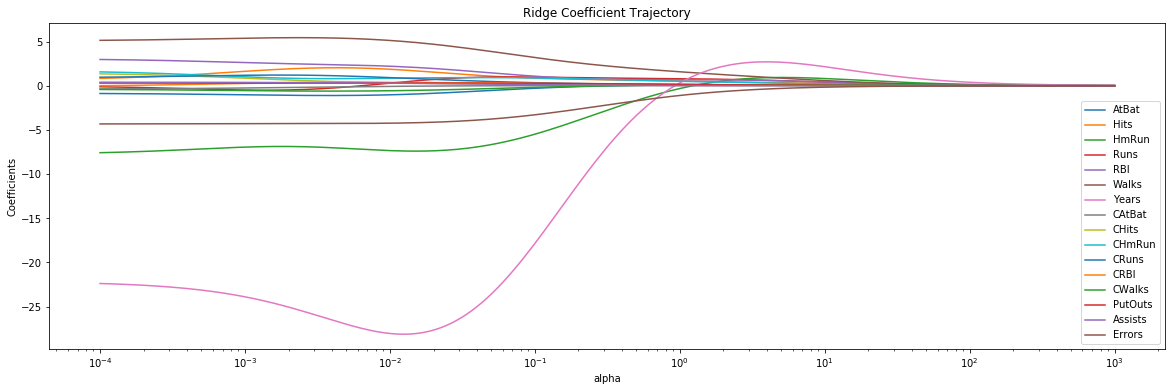

In [41]:
plt.figure(figsize = (20,6))
plt.plot(alphas, coefs_r)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title("Ridge Coefficient Trajectory")
plt.legend(X.columns)
plt.show()

In [42]:
#using defaulted cv value in the RidgeCV function because it uses Leave-One-Out
#and it gives better result for this small dataset
model2 = RidgeCV(alphas = alphas, normalize = True)
model2.fit(np.array(X_train), np.array(y_train))
mod_ridge.set_params(alpha = model2.alpha_)
mod_ridge.fit(X_train, y_train)
y_pred = mod_ridge.predict(X_test)
print("The optimal alpha for Ridge regression from CV is ", model2.alpha_)

The optimal alpha for Ridge regression from CV is  0.0209704640132


### The Mean Squared Errors for Ridge Regression

In [43]:
y_pred_train = mod_ridge.predict(X_train)
print("Training error is ", np.sqrt(np.mean((y_train -y_pred_train)**2)))

Training error is  314.494428594


In [44]:
print("Test error is ", np.sqrt(np.mean((y_test -y_pred)**2)))

Test error is  355.944502244


## 2.1

*Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.*

From the results, we see that Ridge Regression performs slightly better than Lasso Regression at 355.94 and 364.73 mean squared error, respectively. The Lasso Regression model eliminated four fields which reduced the flexibility of the model and thus explains how the Ridge model performed slightly better. Comparing the models to the baseline linear regression model, we see that regularization of the model helped with this dataset from overfitting the data.
Although Ridge regression has the same number of fields as the linear regression model, the coefficients are closer to zero making the model with less variance and high bias. The Ridge performed better than Lasso slightly because there is still more flexibility in Ridge with all the fields. A higher flexibility model is at risk for higher variance and low bias but in this case, the Ridge was able to still outperform the Lasso regression. 

*Below is the MSE result of a simple linear regression*

In [45]:
basicMod = linear_model.LinearRegression(normalize = True)
basicMod.fit(X_train, y_train)
basic_y_pred = basicMod.predict(X_test)
print("The MSE of a simple linear regression is ", np.sqrt(np.mean((y_test -basic_y_pred)**2)))

The MSE of a simple linear regression is  382.224593466
